In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# Dataset structure
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    

In [ ]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# Class distribution
print("\nCrop distribution:\n", df['label'].value_counts())


Crop distribution:
 label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


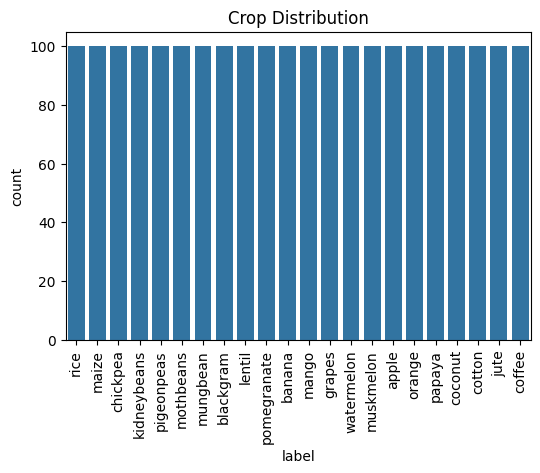

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Crop Distribution')
plt.show()

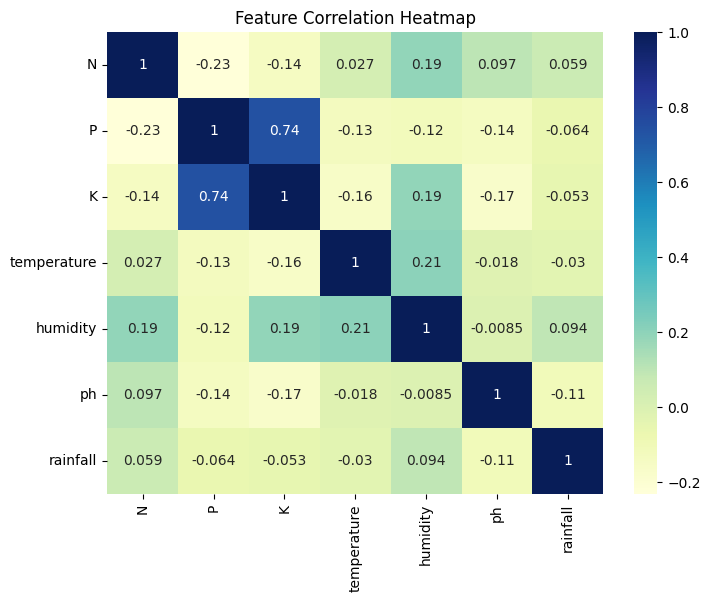

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap="YlGnBu")
plt.title('Feature Correlation Heatmap')
plt.show()

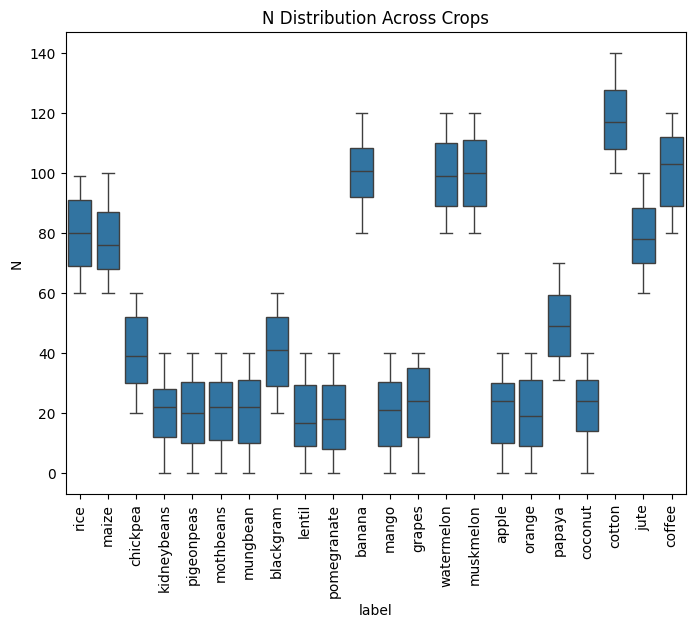

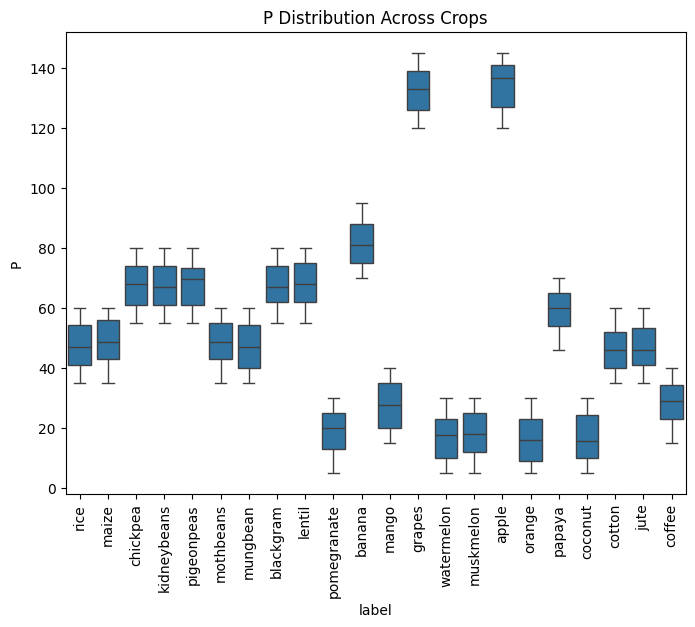

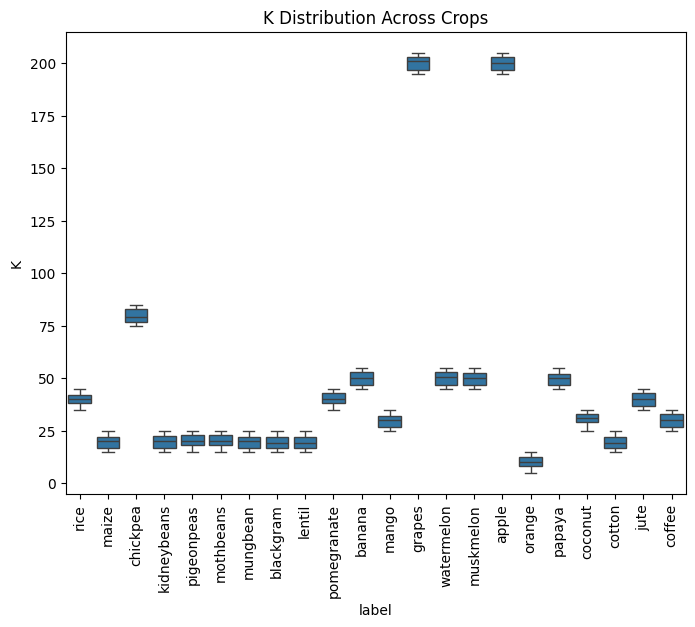

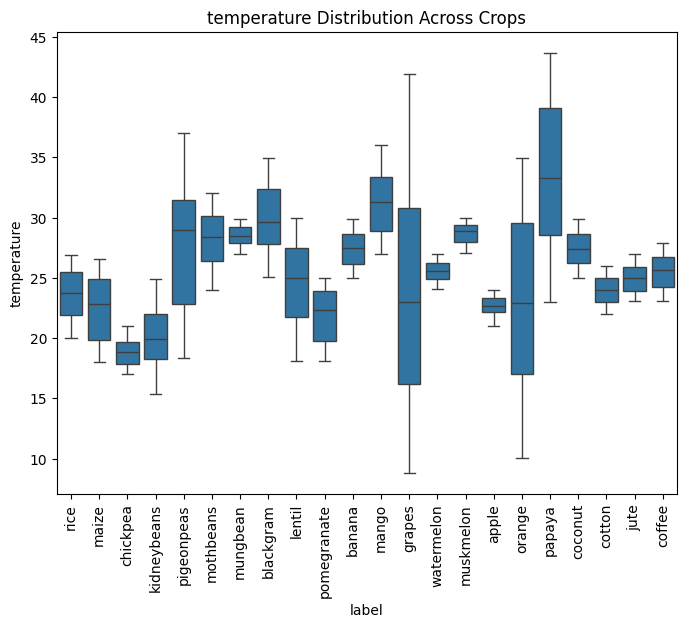

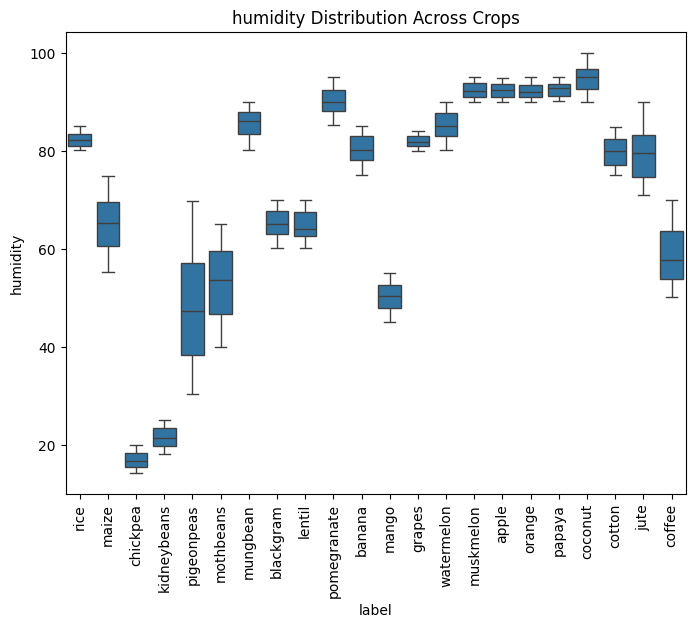

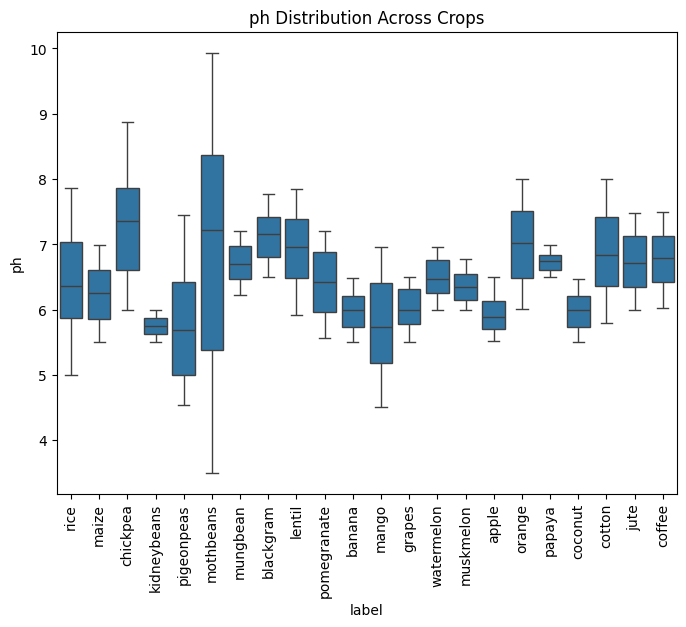

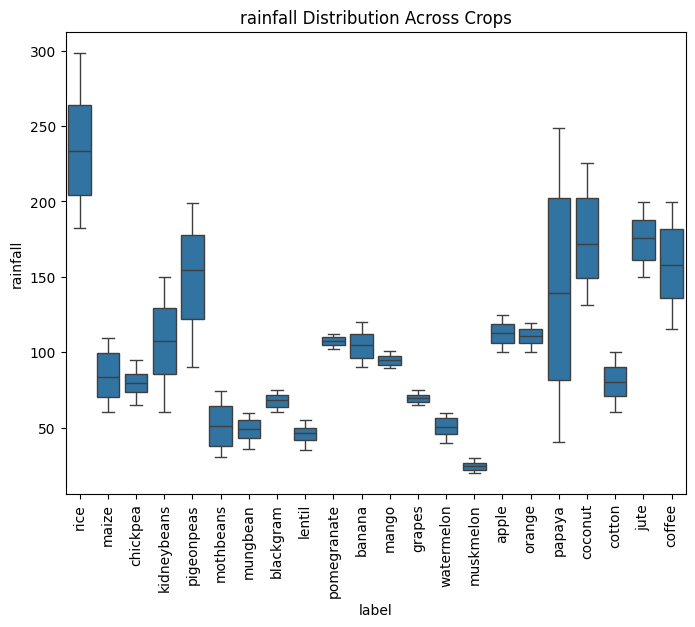

In [ ]:
# Boxplots for feature distribution
for feature in df.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='label', y=feature, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{feature} Distribution Across Crops')
    plt.show()

In [ ]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Save label mapping for future use
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


Random Forest Accuracy: 99.32%


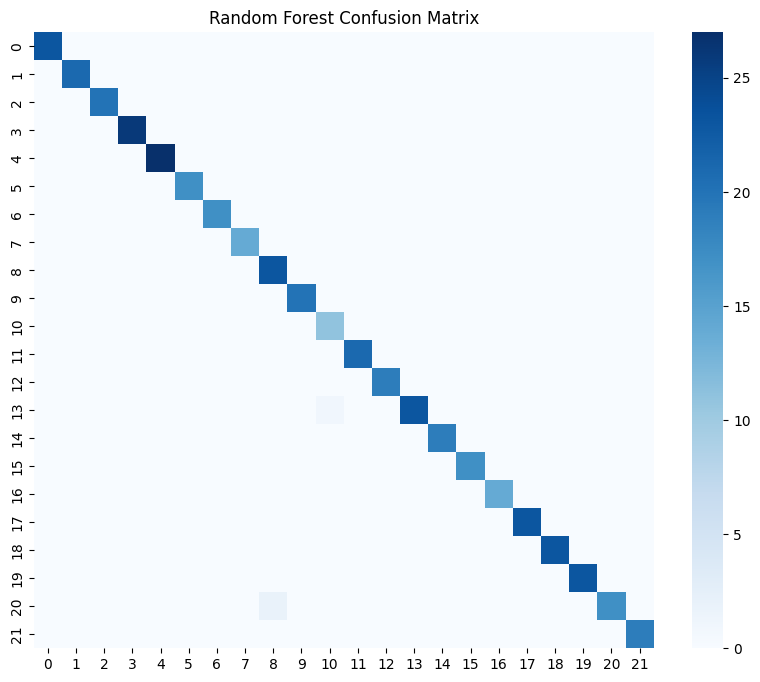

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")

# Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=False, cmap='Blues', cbar=True)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))



Random Forest Accuracy: 99.32%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00      

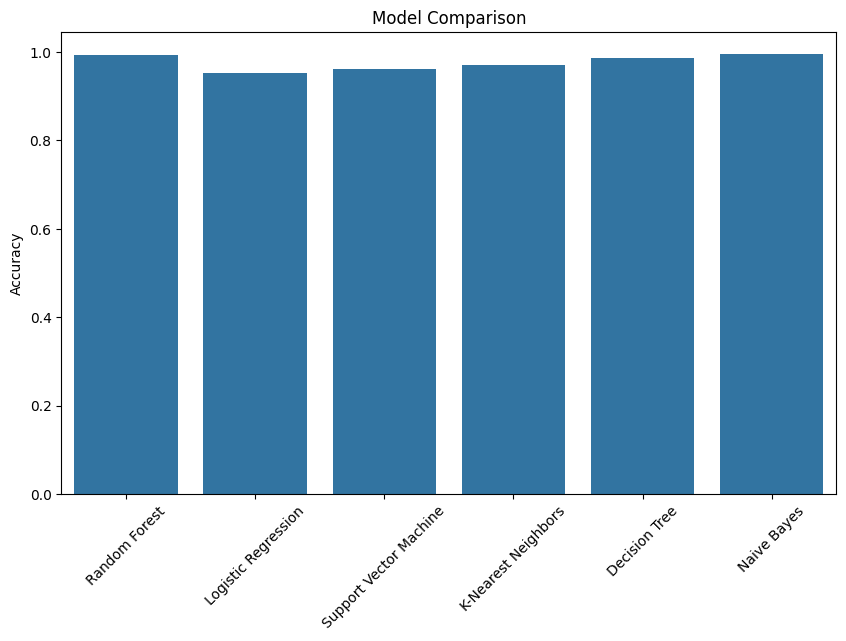

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc
    print(f"\n{model_name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Accuracy Comparison Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Comparison')
plt.show()


In [ ]:
for model_name, model in models.items():
    scores = cross_val_score(model, X, y_encoded, cv=5)
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores)*100:.2f}% (+/- {np.std(scores)*100:.2f}%)")


Random Forest Cross-Validation Accuracy: 99.45% (+/- 0.34%)
Logistic Regression Cross-Validation Accuracy: 97.09% (+/- 0.58%)
Support Vector Machine Cross-Validation Accuracy: 97.82% (+/- 0.40%)
K-Nearest Neighbors Cross-Validation Accuracy: 97.95% (+/- 0.14%)
Decision Tree Cross-Validation Accuracy: 98.68% (+/- 0.33%)
Naive Bayes Cross-Validation Accuracy: 99.50% (+/- 0.22%)


Naive Bayes Accuracy: 99.55%


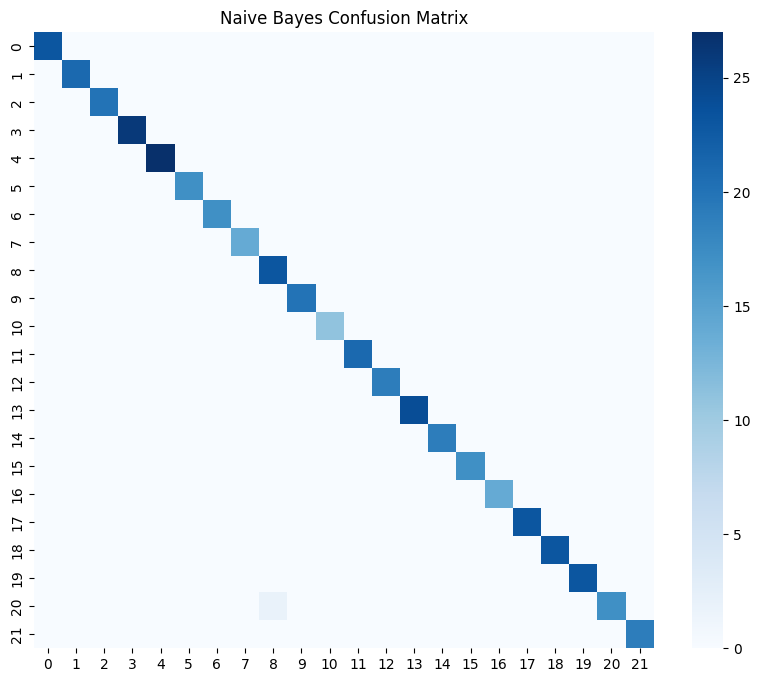

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [ ]:
# Train Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate performance
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)*100:.2f}%")

# Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=False, cmap='Blues', cbar=True)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


In [ ]:
import joblib

# Save the model
joblib.dump(nb_model, 'crop_recommendation_nb_model.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [ ]:
# Load model and label encoder
loaded_model = joblib.load('crop_recommendation_nb_model.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')

In [ ]:
def recommend_crop(input_data):
    input_array = np.array(input_data).reshape(1, -1)

    # If using scaling:
    # input_array = loaded_scaler.transform(input_array)

    prediction = loaded_model.predict(input_array)
    crop = loaded_encoder.inverse_transform(prediction)[0]
    return crop


In [ ]:
# Calculate nutrient thresholds using percentiles
N_threshold_low = df['N'].quantile(0.25)
N_threshold_high = df['N'].quantile(0.75)

P_threshold_low = df['P'].quantile(0.25)
P_threshold_high = df['P'].quantile(0.75)

K_threshold_low = df['K'].quantile(0.25)
K_threshold_high = df['K'].quantile(0.75)

print(f"N thresholds: Low < {N_threshold_low}, High > {N_threshold_high}")
print(f"P thresholds: Low < {P_threshold_low}, High > {P_threshold_high}")
print(f"K thresholds: Low < {K_threshold_low}, High > {K_threshold_high}")


N thresholds: Low < 21.0, High > 84.25
P thresholds: Low < 28.0, High > 68.0
K thresholds: Low < 20.0, High > 49.0


In [ ]:
fertilizer_dict = {
    'N': {
        'low': 'Urea, Ammonium Sulfate',
        'high': 'Avoid nitrogen fertilizers'
    },
    'P': {
        'low': 'Single Super Phosphate (SSP), Diammonium Phosphate (DAP)',
        'high': 'Avoid phosphate fertilizers'
    },
    'K': {
        'low': 'Muriate of Potash (MOP), Sulfate of Potash (SOP)',
        'high': 'Avoid potash fertilizers'
    }
}

def recommend_fertilizer(N, P, K):
    recommendations = []

    if N < N_threshold_low:
        recommendations.append(f'Nitrogen is low: {fertilizer_dict["N"]["low"]}')
    elif N > N_threshold_high:
        recommendations.append(f'Nitrogen is high: {fertilizer_dict["N"]["high"]}')

    if P < P_threshold_low:
        recommendations.append(f'Phosphorus is low: {fertilizer_dict["P"]["low"]}')
    elif P > P_threshold_high:
        recommendations.append(f'Phosphorus is high: {fertilizer_dict["P"]["high"]}')

    if K < K_threshold_low:
        recommendations.append(f'Potassium is low: {fertilizer_dict["K"]["low"]}')
    elif K > K_threshold_high:
        recommendations.append(f'Potassium is high: {fertilizer_dict["K"]["high"]}')

    if not recommendations:
        return 'Nutrient levels are optimal. No additional fertilizers required.'

    return '\n'.join(recommendations)


In [ ]:
try:
    print("Enter the following values:")
    N = float(input("Nitrogen content (N): "))
    P = float(input("Phosphorus content (P): "))
    K = float(input("Potassium content (K): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH value: "))
    rainfall = float(input("Rainfall (mm): "))

    user_input = [N, P, K, temperature, humidity, ph, rainfall]

    # Recommend crop
    recommended_crop = recommend_crop(user_input)
    print("\nRecommended Crop:", recommended_crop.capitalize())

    # Recommend fertilizer
    fertilizer_advice = recommend_fertilizer(N, P, K)
    print("\nFertilizer Recommendation:")
    print(fertilizer_advice)

except ValueError:
    print("Please enter valid numeric values.")


Enter the following values:
Nitrogen content (N): 55
Phosphorus content (P): 42
Potassium content (K): 80
Temperature (°C): 28.15
Humidity (%): 88
pH value: 5.54
Rainfall (mm): 100.552

Recommended Crop: Banana

Fertilizer Recommendation:
Potassium is high: Avoid potash fertilizers
